In [1]:
from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/MyDrive


Mounted at /content/drive
/content/drive/MyDrive


In [2]:
%cd Data_Science_Assignments/assignment1_p2_data_2023

/content/drive/MyDrive/Data_Science_Assignments/assignment1_p2_data_2023


## CS/INFO 5304 Assignment 1: Data Preparation <br />

### Case 1: Actual screen time

Int64Index([2, 7, 27, 50], dtype='int64')


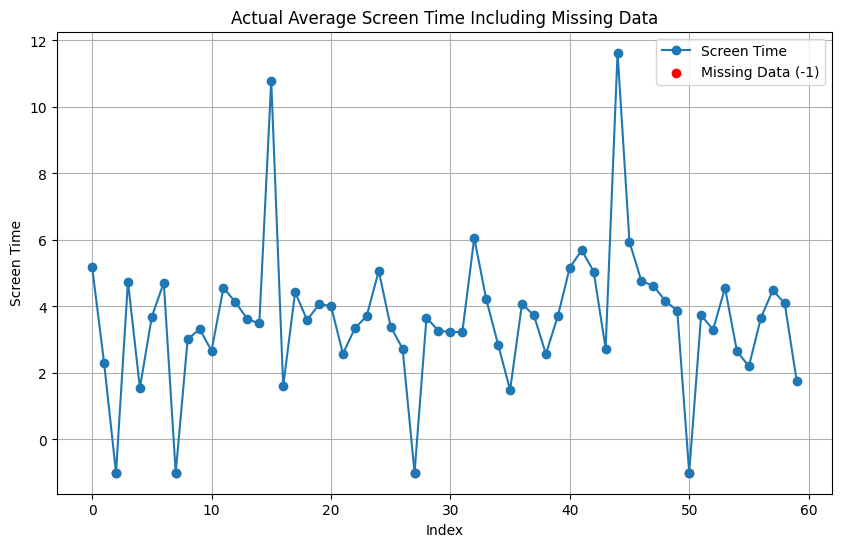

In [3]:
import pandas
import matplotlib.pyplot as plt

individual_data = pandas.read_pickle("Extrasensory_individual_data.p")

plt.figure(figsize=(10, 6))
plt.plot(individual_data.index, individual_data['actual_average_screen_time'], marker='o', linestyle='-', label='Screen Time')
plt.title('Actual Average Screen Time Including Missing Data')
plt.xlabel('Index')
plt.ylabel('Screen Time')
plt.grid(True)

missing_values = individual_data['actual_average_screen_time'] == -1

print(individual_data.index[missing_values])
plt.scatter(individual_data.index[missing_values], individual_data['actual_average_screen_time'][missing_values], color='red', label='Missing Data (-1)')

# Manually add legend for scatter plot
plt.legend()

plt.show()


#### Writeup Answer to Problem A:
How are missing values represented for this feature?

Answer: It is represented as -1

## Case 1 Problem B code and graph

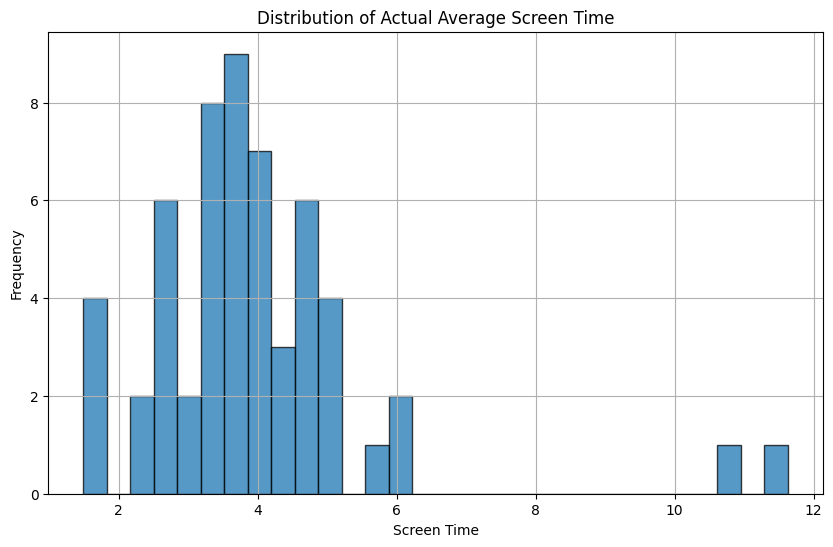

In [4]:
valid_data = individual_data[individual_data['actual_average_screen_time'] != -1]


plt.figure(figsize=(10, 6))
plt.hist(valid_data['actual_average_screen_time'], bins=30, alpha=0.75, edgecolor='black')

plt.title('Distribution of Actual Average Screen Time')
plt.xlabel('Screen Time')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

In [5]:
Q1 = valid_data['actual_average_screen_time'].quantile(0.25)
Q3 = valid_data['actual_average_screen_time'].quantile(0.75)
IQR = Q3 - Q1

# Calculate thresholds for outliers
low_threshold = Q1 - 1.5 * IQR
high_threshold = Q3 + 1.5 * IQR

# Find outliers
outliers = valid_data[(valid_data['actual_average_screen_time'] < low_threshold) | (valid_data['actual_average_screen_time'] > high_threshold)]

# Count the number of outliers
num_outliers = outliers.shape[0]

print("Number of outliers:", num_outliers)

Number of outliers: 2


In [6]:
skewness = valid_data['actual_average_screen_time'].skew()

if skewness > 0:
    skew_direction = "right"
elif skewness < 0:
    skew_direction = "left"
else:
    skew_direction = "symmetric"

print("Skewness:", skewness)
print("The data is", skew_direction, "skewed.")

Skewness: 2.4639261915800215
The data is right skewed.


#### Writeup Answer to Problem B:
 Does it have outliers?If so, how many?
 Is it skewed? If so, is it left skewed or right skewed? What’s the skewness?


Answer: Number of outliers: 2

Yes the data is skewed.
Skewness: 2.4639261915800215
The data is right skewed.

## Case 1 Problem C code and graph

In [7]:
import numpy as np

# Method 1: Filling with median
median_value = valid_data['actual_average_screen_time'].median()
individual_data['actual_average_screen_time_filled_median'] = individual_data['actual_average_screen_time'].replace(-1, median_value)

# Method 2: Filling with mean
mean_value = valid_data['actual_average_screen_time'].mean()
individual_data['actual_average_screen_time_filled_mean'] = individual_data['actual_average_screen_time'].replace(-1, mean_value)

# Method 3: Filling with a random value within a chosen range
# Choose a range for random values, for example, between the min and max of the column
min_value = valid_data['actual_average_screen_time'].min()
max_value = valid_data['actual_average_screen_time'].max()
random_value = np.random.uniform(low=min_value, high=max_value)
individual_data['actual_average_screen_time_filled_random'] = individual_data['actual_average_screen_time'].replace(-1, random_value)

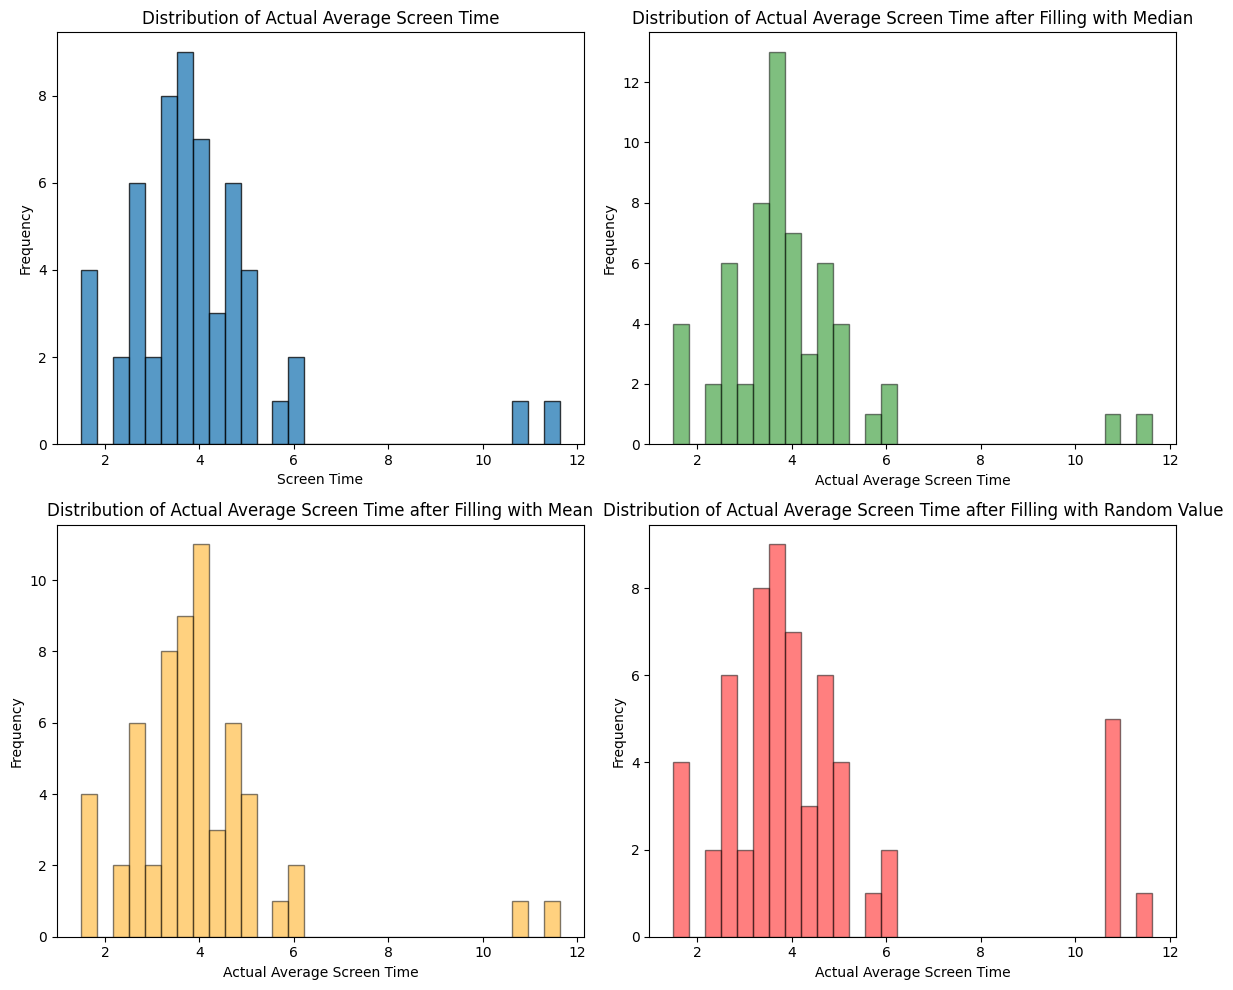

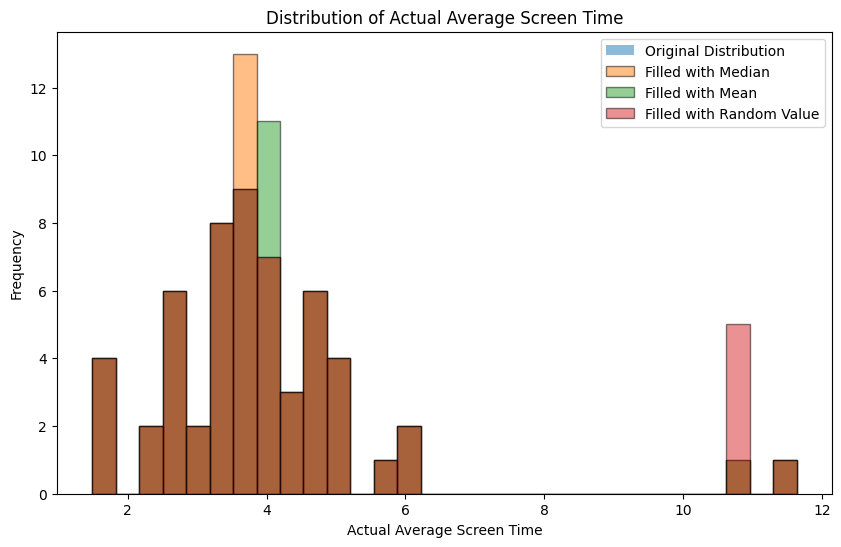

In [8]:
# Plot original distribution
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.hist(valid_data['actual_average_screen_time'], bins=30, alpha=0.75, edgecolor='black')

plt.title('Distribution of Actual Average Screen Time')
plt.xlabel('Screen Time')
plt.ylabel('Frequency')


# Plot distribution after filling with median
plt.subplot(2, 2, 2)
plt.hist(individual_data['actual_average_screen_time_filled_median'], bins=30, alpha=0.5, color='green', edgecolor='black')
plt.xlabel('Actual Average Screen Time')
plt.ylabel('Frequency')
plt.title('Distribution of Actual Average Screen Time after Filling with Median')


# Plot distribution after filling with mean
plt.subplot(2, 2, 3)
plt.hist(individual_data['actual_average_screen_time_filled_mean'], bins=30, alpha=0.5, color='orange', edgecolor='black')
plt.xlabel('Actual Average Screen Time')
plt.ylabel('Frequency')
plt.title('Distribution of Actual Average Screen Time after Filling with Mean')


# Plot distribution after filling with random value
plt.subplot(2, 2, 4)
plt.hist(individual_data['actual_average_screen_time_filled_random'], bins=30, alpha=0.5, color='red', edgecolor='black')
plt.xlabel('Actual Average Screen Time')
plt.ylabel('Frequency')
plt.title('Distribution of Actual Average Screen Time after Filling with Random Value')


plt.tight_layout()
plt.show()

# Plot original distribution
plt.figure(figsize=(10, 6))
plt.hist(valid_data['actual_average_screen_time'], bins=30, alpha=0.5, label='Original Distribution')

# Plot distributions after filling with different methods
plt.hist(individual_data['actual_average_screen_time_filled_median'], bins=30, alpha=0.5, label='Filled with Median', edgecolor='black')
plt.hist(individual_data['actual_average_screen_time_filled_mean'], bins=30, alpha=0.5, label='Filled with Mean', edgecolor='black')
plt.hist(individual_data['actual_average_screen_time_filled_random'], bins=30, alpha=0.5, label='Filled with Random Value', edgecolor='black')

plt.xlabel('Actual Average Screen Time')
plt.ylabel('Frequency')
plt.title('Distribution of Actual Average Screen Time')
plt.legend()
plt.show()

In [9]:
print("Median fill Skewness: ", individual_data['actual_average_screen_time_filled_median'].skew())
print("Mean fill Skewness: ", individual_data['actual_average_screen_time_filled_mean'].skew())
print("Random fill Skewness: ", individual_data['actual_average_screen_time_filled_random'].skew())

Median fill Skewness:  2.5712456708461042
Mean fill Skewness:  2.5456655468536407
Random fill Skewness:  1.8860166535056422


#### Writeup Answer to Problem C:
How did you choose the random value from method 3)?
How do the distributions look like after you implement the three filling methods? (Compare them)

Answer: I used np.random.uniform function and chose the range between min and max value of the average screen time.

The distributions looked almost similar since the missing values were less in number(This can be observed from the skewness values). However, the center portion seems to be slightly more dense

## Case 1 Problem D code and graph

In [10]:
from scipy.stats import ttest_ind

mean = 3.85
std = 1.25
num_samples = 400
normal_dist = np.random.normal(mean, std, num_samples)

t_statistic_median, p_value_median = ttest_ind(normal_dist, individual_data['actual_average_screen_time_filled_median'])
t_statistic_mean, p_value_mean = ttest_ind(normal_dist, individual_data['actual_average_screen_time_filled_mean'])
t_statistic_random, p_value_random = ttest_ind(normal_dist, individual_data['actual_average_screen_time_filled_random'])

# Print results
print("T-test results:")
print("T-test with distribution filled with median: T-statistic =", t_statistic_median, ", p-value =", p_value_median)
print("T-test with distribution filled with mean: T-statistic =", t_statistic_mean, ", p-value =", p_value_mean)
print("T-test with distribution filled with random value: T-statistic =", t_statistic_random, ", p-value =", p_value_random)

T-test results:
T-test with distribution filled with median: T-statistic = -0.752430531296786 , p-value = 0.4521787245049802
T-test with distribution filled with mean: T-statistic = -0.8499393552277934 , p-value = 0.39580288207530445
T-test with distribution filled with random value: T-statistic = -3.108693402807004 , p-value = 0.0019962145450846303


#### Answer to Problem D:
Report the three p-values. Which one of the filling methods reconstruct this feature to be closest to the research distribution? Why do you think this is the case?

p-value with distribution filled with median: 0.755187634235717
p-value with distribution filled with mean: 0.6866341955959607
p-value with distribution filled with random value: 0.7106051651342314

The distribution filled with median reconstucted the feature to be closest to the research distribution. The median is less sensitive to outliers compared to the mean would explain this behaviour. Moreover, median is more stable than random value.

### Case 2: Perceived average screen time

## Case 2 Problem A code and histogram

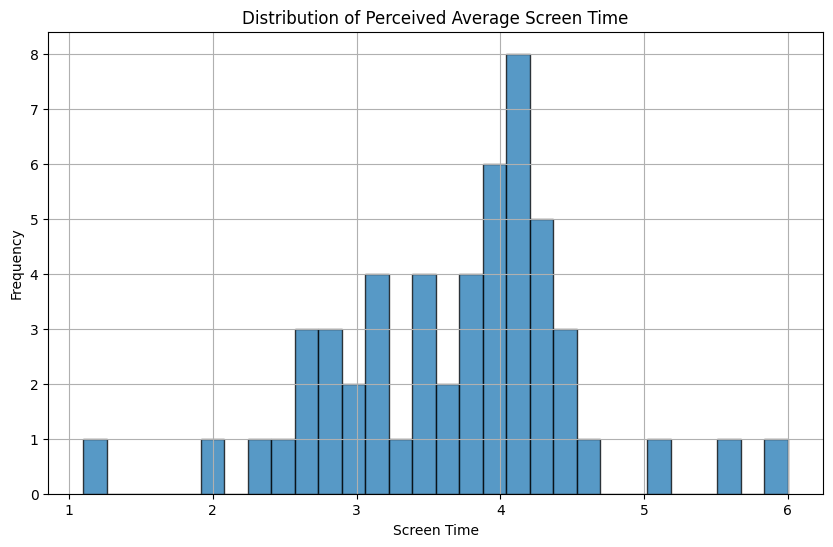

In [11]:
valid_data_2 = individual_data[individual_data['perceived_average_screen_time'] != -1]


plt.figure(figsize=(10, 6))
plt.hist(valid_data_2['perceived_average_screen_time'], bins=30, alpha=0.75, edgecolor='black')

plt.title('Distribution of Perceived Average Screen Time')
plt.xlabel('Screen Time')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

In [12]:
Q1 = valid_data_2['perceived_average_screen_time'].quantile(0.25)
Q3 = valid_data_2['perceived_average_screen_time'].quantile(0.75)
IQR = Q3 - Q1

# Calculate thresholds for outliers
low_threshold = Q1 - 1.5 * IQR
high_threshold = Q3 + 1.5 * IQR

# Find outliers
outliers = valid_data_2[(valid_data_2['perceived_average_screen_time'] < low_threshold) | (valid_data_2['perceived_average_screen_time'] > high_threshold)]

# Count the number of outliers
num_outliers = outliers.shape[0]

print("Number of outliers:", num_outliers)

skewness = valid_data_2['perceived_average_screen_time'].skew()

if skewness > 0:
    skew_direction = "right"
elif skewness < 0:
    skew_direction = "left"
else:
    skew_direction = "symmetric"

print("Skewness:", skewness)
print("The data is", skew_direction, "skewed.")

print(len(valid_data_2))

Number of outliers: 2
Skewness: -0.21439363473731404
The data is left skewed.
53


#### Writeup Answer to Problem A:
 Does it have outliers?If so, how many?
 Is it skewed? If so, is it left skewed or right skewed? What’s the skewness?

 Yes, it has 2 outliers.
 Yes it is left skewed with a value of -0.21439

## Case 2 Problem B code

In [13]:
# Calculate mean and standard deviation
mean_screen_time = valid_data['actual_average_screen_time'].mean()
std_screen_time = valid_data['actual_average_screen_time'].std()

# Define threshold for intense phone user
threshold = mean_screen_time + std_screen_time

# Count intense phone users
intense_users = valid_data[valid_data['actual_average_screen_time'] >= threshold]
num_intense_users = len(intense_users)

print("Number of intense phone users:", num_intense_users)

Number of intense phone users: 4


How many of them are intense phone users?
Answer: 4



## Case 2 Problem C code and graph

In [14]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create boolean array for missing perceived_average_screen_time (A)
missing_perceived_time = valid_data['perceived_average_screen_time'] == -1

# Create boolean array for intense phone users (B)
intense_users = valid_data['actual_average_screen_time'] >= threshold

# Generate contingency table
contingency_table = pd.crosstab(missing_perceived_time, intense_users)

# Perform Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(p_value)
print(chi2_stat)
print(dof)
print(expected)

0.11666446478102341
2.4615384615384617
1
[[45.5  3.5]
 [ 6.5  0.5]]


What is the p-value? Do you think they are correlated? What does this mean? Do you think this feature is MAR or MNAR?

p-value is 0.1166 and  Since the p-value is greater than the significance level (0.05), we fail to reject the null hypothesis. This indicates that there is insufficient evidence to conclude that there is a significant correlation between missing perceived_average_screen_time and being an intense phone user. Hence, we can't directly conclude the feature to be MAR or MNAR.

### Case 3: Location

## Case 3 Problem A code (graph)

In [42]:
location_data = pandas.read_pickle("Extrasensory_sensor_data.p")

uuids_with_behavior = []

for uuid, df in location_data.items():
  low_battery_df = df[df['lf_measurements:battery_level'] < 0.20]
  if low_battery_df['location:raw_latitude'].isnull().all() and not low_battery_df.empty:
        print("User ID", uuid)
        print("Number of  missing Minutes", len(low_battery_df['location:raw_latitude'].isnull()))
        uuids_with_behavior.append(uuid)

#print(a['location:raw_latitude'] if a['discrete:app_state:missing'] == 1.0)

User ID 098A72A5-E3E5-4F54-A152-BBDA0DF7B694
Number of  missing Minutes 415
User ID CDA3BBF7-6631-45E8-85BA-EEB416B32A3C
Number of  missing Minutes 74
User ID 96A358A0-FFF2-4239-B93E-C7425B901B47
Number of  missing Minutes 277
User ID B09E373F-8A54-44C8-895B-0039390B859F
Number of  missing Minutes 369
User ID B7F9D634-263E-4A97-87F9-6FFB4DDCB36C
Number of  missing Minutes 176


Explanation of implementation

 I'm identifying users who have experienced low battery levels (lf_measurements:battery_level < 0.20) and have missing location data (raw_latitude is null) during that time CONSISTENTLY.

For each USER_ID, the missing minutes has been printed above

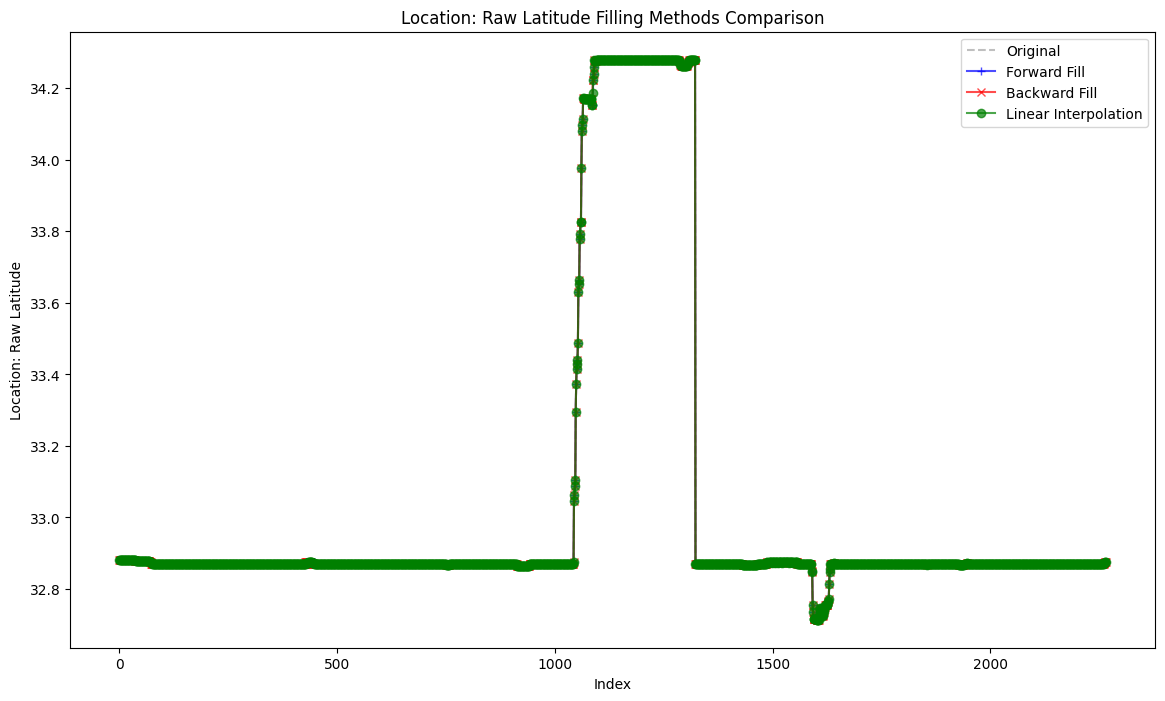

In [48]:
focus_subject = "F50235E0-DD67-4F2A-B00B-1F31ADA998B9"
subject_data = location_data[focus_subject]

# Forward filling
subject_data['location:raw_latitude_forward_filled'] = subject_data['location:raw_latitude'].fillna(method='ffill')

# Backward filling
subject_data['location:raw_latitude_backward_filled'] = subject_data['location:raw_latitude'].fillna(method='bfill')

# Linear interpolation
subject_data['location:raw_latitude_linear_interpolated'] = subject_data['location:raw_latitude'].interpolate(method='linear')


plt.figure(figsize=(14, 8))
plt.plot(subject_data.index, subject_data['location:raw_latitude'], label='Original', linestyle='--', color='gray', alpha=0.5)
plt.plot(subject_data.index, subject_data['location:raw_latitude_forward_filled'], label='Forward Fill', linestyle='-', marker='+', color='blue', alpha=0.7)
plt.plot(subject_data.index, subject_data['location:raw_latitude_backward_filled'], label='Backward Fill', linestyle='-', marker='x', color='red', alpha=0.7)
plt.plot(subject_data.index, subject_data['location:raw_latitude_linear_interpolated'], label='Linear Interpolation', linestyle='-', marker='o', color='green', alpha=0.7)

plt.title('Location: Raw Latitude Filling Methods Comparison')
plt.xlabel('Index')
plt.ylabel('Location: Raw Latitude')
plt.legend()
plt.show()

Compare the 4 traces. What do you see? If you were to use this dataset for further analysis, which filling method will you choose?

When comparing the four traces in the figure:

The original trace has gaps, indicated by breaks or vertical lines where the data points are missing.

The forward fill method fills these gaps by extending the last known value forward until a new value is encountered.

The backward fill method fills the gaps from the opposite direction, extending the next known value backward.

The linear interpolation method provides a smoother transition between known values by filling in the gaps with a straight line connecting the points immediately before and after the gap.

I would likely choose linear interpolation. This method assumes that the change between two time points is linear and therefore provides a reasonable estimate for the missing values
